# <div align="center"><b> Exploración de datos EuroSAT-RGB </b></div>

<div align="right">

<!-- [![Binder](http://mybinder.org/badge.svg)](https://mybinder.org/) -->
[![nbviewer](https://img.shields.io/badge/render-nbviewer-orange?logo=Jupyter)](https://nbviewer.org/github/brunomaso1/vision-transformer/blob/main/notebooks/0.01-exploracion-datos.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/brunomaso1/vision-transformer/blob/main/notebooks/0.01-exploracion-datos.ipynb)

</div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻


Este notebook utiliza [Poetry](https://python-poetry.org/) para la gestión de dependencias.
Primero instala Poetry siguiendo las instrucciones de su [documentación oficial](https://python-poetry.org/docs/#installation).
Luego ejecuta el siguiente comando para instalar las dependencias necesarias y activar el entorno virtual:

- Bash:

```bash
poetry install
eval $(poetry env activate)
```

- PowerShell:

```powershell
poetry install
Invoke-Expression (poetry env activate)
```

> 📝 <em><font color='Gray'>Nota:</font></em> Para agregar `pytorch` utilizando Poetry, se utiliza el siguiente comando:
> ```bash
> # Más info: https://github.com/python-poetry/poetry/issues/6409
> potery source add --priority explicit pytorch_gpu https://download.pytorch.org/whl/cu128 # Seleccionar la wheel adecuada para tu GPU
> poetry add --source pytorch_gpu torch torchvision 
> ```

✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [1]:
# Recarga automática de módulos en Jupyter Notebook
%reload_ext autoreload
%autoreload 2

import random

import numpy as np

# Modulos propios
from vision_transformer.config import RANDOM_SEED
from vision_transformer.dataset import load_huggingface_dataset
from vision_transformer.plots import show_image, show_image_grid, plot_class_distribution, plot_class_histograms

2025-06-18 17:33:52.375 | INFO     | vision_transformer.config:<module>:15 - PROJ_ROOT path is: E:\Documentos\Git Repositories\vision-transformer
2025-06-18 17:33:52.376 | INFO     | vision_transformer.config:<module>:19 - Actual environment is: dev


🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [2]:
random.seed(RANDOM_SEED)

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Exploración de datos sobre el conjunto EuroSAT-RGB                                                                       |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | <small>Análisis exploratorio sobre el EuroSAT<br/> - *Tarea:* `Clasificación`<br/>- *Modelo*: `NaN`<br/> - *Dataset*: `EuroSAT` </small>|

</div>

## Tabla de contenidos
0. [Pasos previos](#pasos-previos)
1. [Carga de datos](#carga-de-datos)
2. [Exploración de datos](#exploracion-de-datos)

## 0. Pasos previos <a id="pasos-previos"></a>

Ejecuta desde la raíz del proyecto para descargar el dataset EuroSAT:

```bash
python -m vision_transformer.flows.cli prepare-dataset-flow huggingface
```

## 1. Carga de datos <a name="carga-de-datos"></a>

In [3]:
dataset = load_huggingface_dataset()

2025-06-18 17:33:53.088 | INFO     | vision_transformer.dataset:load_huggingface_dataset:441 - Cargando el dataset procesado...
2025-06-18 17:33:53.411 | INFO     | vision_transformer.dataset:load_huggingface_dataset:453 - El dataset contiene múltiples conjuntos (train, test, val). Cargando todos...


Resolving data files:   0%|          | 0/24300 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/2700 [00:00<?, ?it/s]

## 2. Exploración de datos

Analizamos la estructura del dataset cargado en formato HuggingFace.

In [4]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 24300
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2700
    })
})


Visualizamos las clases presentes en el dataset, y su distribución en el set de entrenamiento y de evaluación.

In [5]:
id2label = {id:label for id, label in enumerate(dataset['train'].features['label'].names)}
label2id = {label:id for id,label in id2label.items()}

print("Cantidad de clases:", len(id2label), "\n")
for k, v in id2label.items():
    print(f"- id {k}: {v}")

Cantidad de clases: 10 

- id 0: AnnualCrop
- id 1: Forest
- id 2: HerbaceousVegetation
- id 3: Highway
- id 4: Industrial
- id 5: Pasture
- id 6: PermanentCrop
- id 7: Residential
- id 8: River
- id 9: SeaLake


Cantidad de imágenes en el set de entrenamiento: 24300 



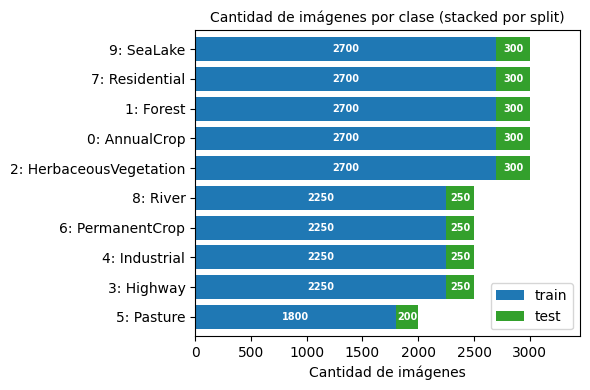

In [6]:
print("Cantidad de imágenes en el set de entrenamiento:", len(dataset['train']), "\n")

plot_class_distribution(dataset, id2label, ("train", "test"), colors=("#1f78b4", "#33a02c"))

Visualizamos un muestreo de las imágenes de entrenamiento.

In [7]:
dataset["train"][0]["image"].size

(64, 64)

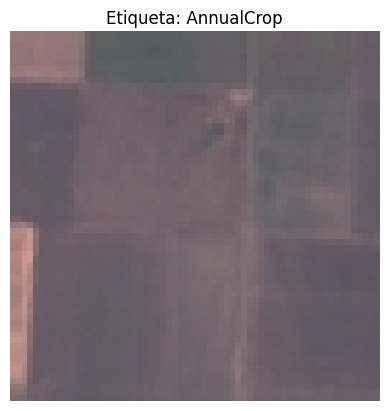

Tamaño de la imagen en pixeles: (64, 64)


In [8]:
image = dataset["train"][0]["image"]
label = id2label[dataset["train"][0]["label"]]

show_image(image, label)

print("Tamaño de la imagen en pixeles:", image.size)

In [9]:
def sample_one_index_per_class(labels, seed=None):
    if seed is not None:
        np.random.seed(seed)

    unique_classes = np.unique(labels)
    sampled_indices = []

    for cls in unique_classes:
        cls_indices = np.where(labels == cls)[0]
        sampled_idx = np.random.choice(cls_indices)
        sampled_indices.append(int(sampled_idx))

    return sampled_indices

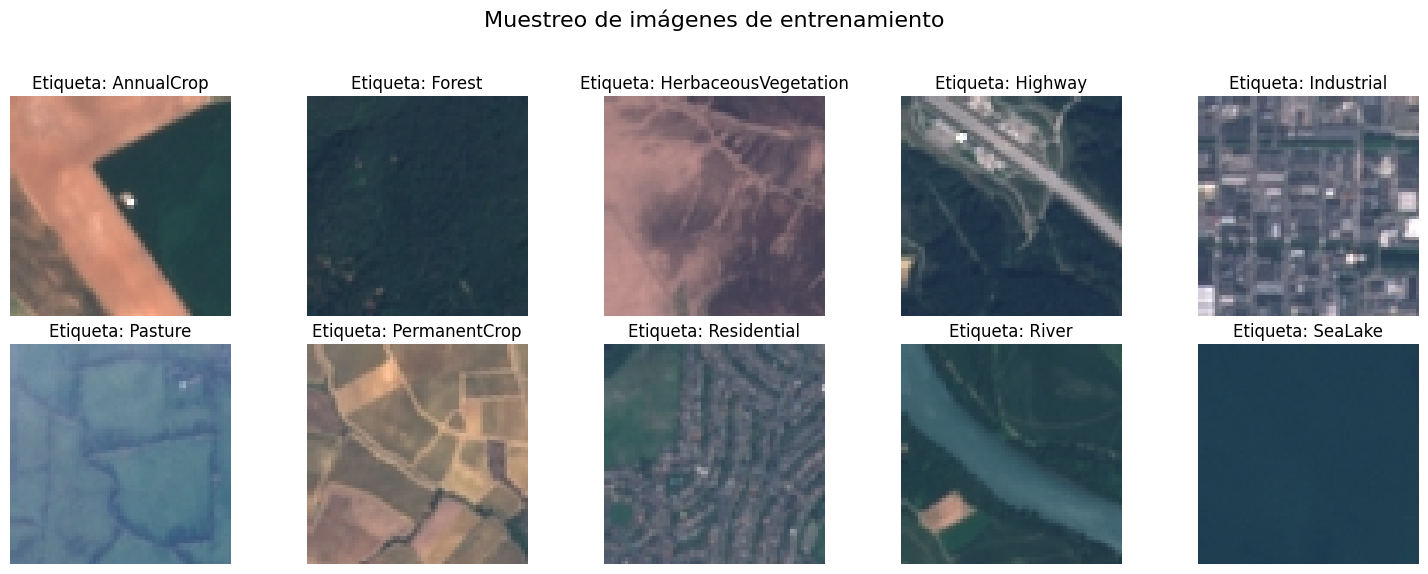

In [10]:
random_indices = sample_one_index_per_class(dataset["train"]["label"])

grid_data = {
    "images": [dataset["train"][i]["image"] for i in random_indices],
    "labels": [id2label[dataset["train"][i]["label"]] for i in random_indices]
}

show_image_grid(grid_data, title="Muestreo de imágenes de entrenamiento", num_cols=5)

Visualizamos el histograma acumulado para cada una de las clases considerando los canales HSL. Esto es, la proporcion de pixeles de cada valor (en cada uno de los canales) para la totalidad de imágenes de una misma clase.

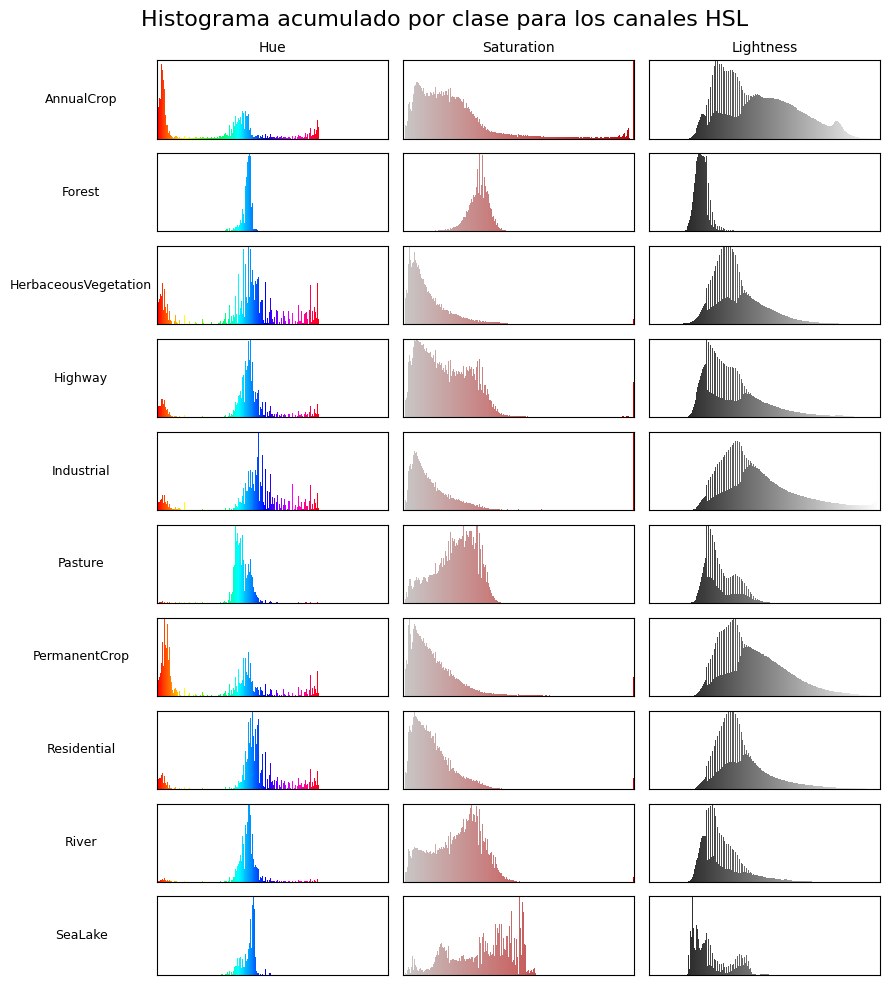

In [12]:
plot_class_histograms(dataset, id2label, split="train")